# Credit card customer analysis, Churn Prediction 
### Group 1
### Joel Lautenschlager, Rabea Radman, Soyuz Shrestha, Sayali Dhore, Aron Firew

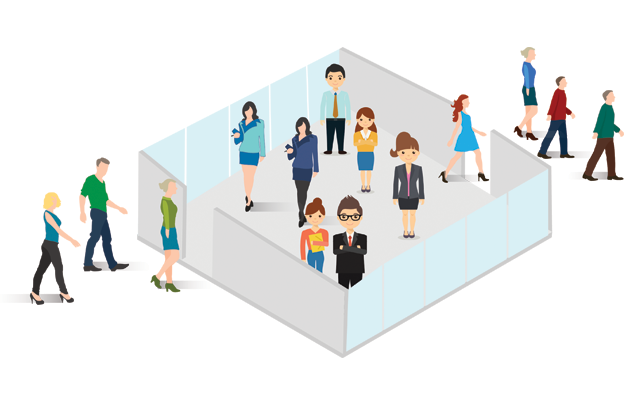

# 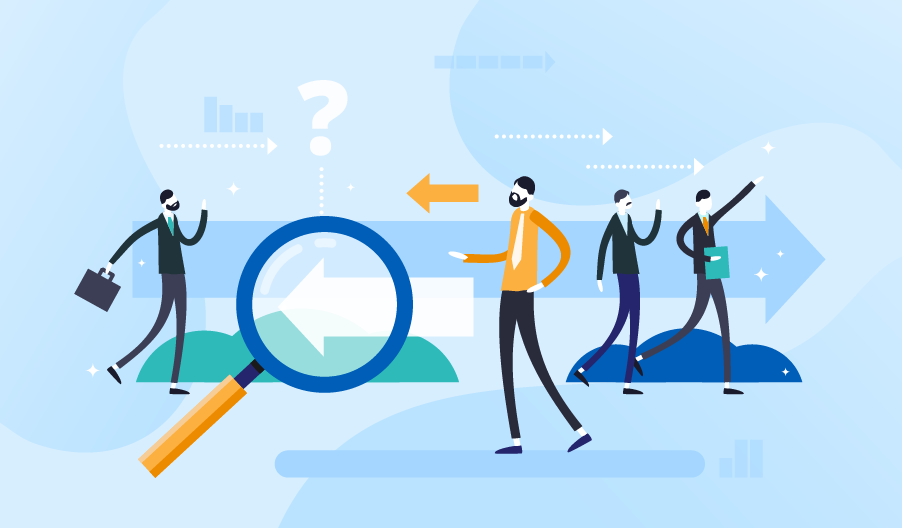

# Section 1:

# 1. Business Problem

## 1.1 Problem Description

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate it if we could predict for them who is going to get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction. This dataset is from a website with the URL https://leaps.analyttica.com/home

# 2. Business Question
Which customers are more likely to leave the bank? 

# 3. Analytical Problem & Approach

This project is done in a series of phases, the first of which involves an exploratory data analysis, where the objective is to know the nature of the variables and to examine attributes that indicate a strong relationship with leaving credit card services. The next phase involves applying a machine-learning algorithm to find the best properties for building the model. At the end of the project, after finishing all steps, a machine learning model will be utilized, adept at predicting, based on the data of a structure, whether a customer will cancel the credit card service or not. 

# 4. Dataset & Target Variable
We have 10,127 customers and out of those 8500 customers are existing and 1627 are attritted customers which gives us percentages or 84.9% for existing customers vs 16.1% of attrited customers since we only 16% of the customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers since the sample is very small comparing the total number of customers. 
### Target Variable:
The data has 20 features. Of the features provided, 6 are categorical variables (including the target which is the attrition flag), 13 are continuous variables, and one is a ratio. The data has numerous demographic data, as well as data about the relationship the bank currently has with its customer. The information would be of particular use to the customer retention department, whose success is measured by the number of customers that can retain. The bank currently has limited solutions in place to predict whether a customer will churn or not, and our goal is to predict which customers are more likely to leave the bank. The initial success of the model will be assessed by its accuracy on a train/test split, but ultimately the success of the model is measured by how accurately it can predict whether a customer will leave the bank. 

# 5. Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from math import sqrt
#To perfom Exploratory Data Analysis (EDA) in just one line of a code 
import pandas_profiling
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, log_loss
from sklearn import utils
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#import warnings
#import numpy as np
#warnings.simplefilter(action='ignore', category=FutureWarning)
#print('x' in np.arange(5))   #returns False, without Warning
#Makes the notebook full width for preference
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# 6. Loading the data

In [5]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.shape

(10127, 23)

In [4]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# 7. Exploratory Data Analysis (EDA)
The objective of this step is to dig deep into the data to discover the main elements that are contributing to the cancellation of credit card service bank customers. For this step we will use panda profiling to derive statistical information of each variable (Descriptive Analysis & Visualization) and to check the correlation between features which will provide important insights to carry on with the rest of the analysis in this project 

# 8. Preperation 
## 8.1 Part1:
We start preparing the dataset by removing the last two columns because the two columns have irrelevant information will cause problems to the models. We will also drop the first column because it is very insignificant to the dataset and analysis.

In [5]:
#Deleting unnecessary columns
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
#Copying the dataframe
df1 = df

In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(10127, 21)

In [7]:
pandas_profiling.ProfileReport(df, title = 'Credit Card Churn', html={'style':{'full_width':True}})

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

## 8.2 Part 2:
The dataset is fairly clean and has no missing values, no duplicated rows, and no NaN values, however there are significant “unknowns”. We start preparing the dataset by removing the last two columns because the two columns have irrelevant information Since machine learning algorithms cannot work directly with categorical data and so we do need to do some engineering and transformations on this data before we can start modeling our dataset. The engineering required is dependent on the type of model used. 

In [9]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
df['target'] = (df.Attrition_Flag == 'Attrited Customer').astype(int)
#target is the attrited customer under the attrited flag variable

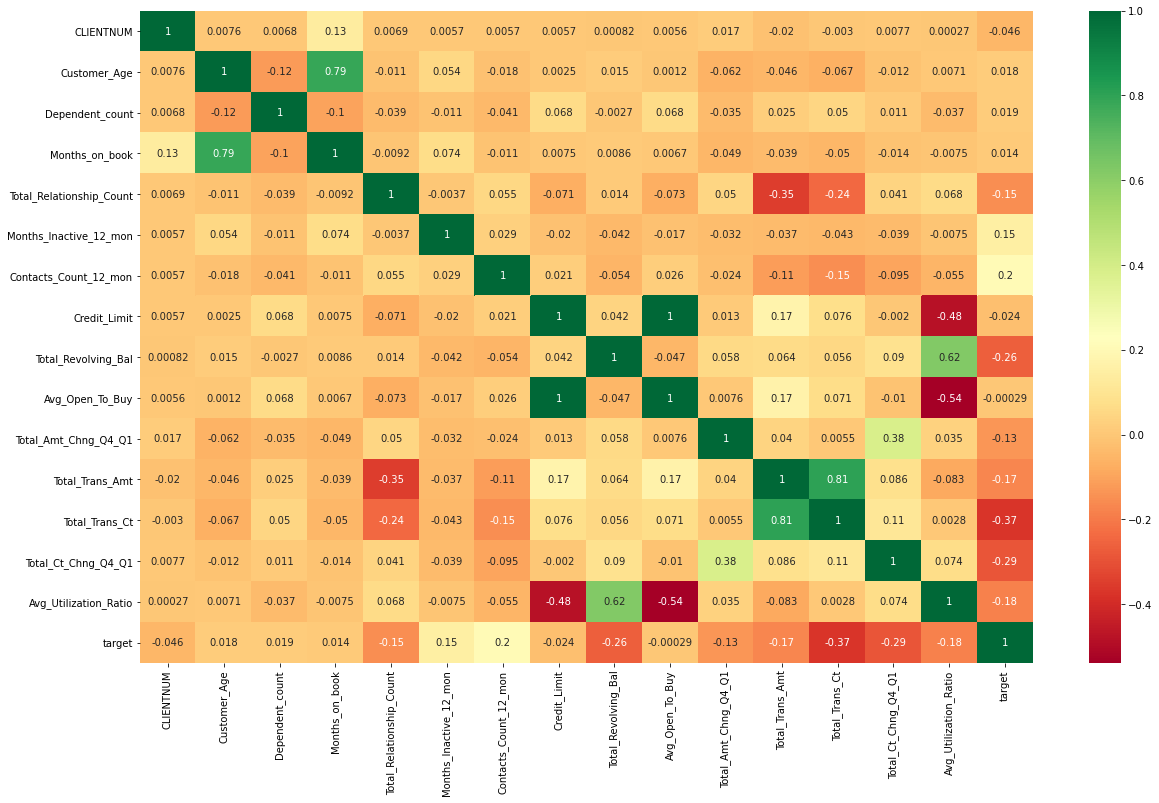

In [11]:
feats = ['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

plt.subplots(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

# correlation between variables on each axis
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

## 8.3 Part 3:
### Correlation Analysis - Spearman's Rank Correlation

The Spearman's rank correlation coefficient (ρ) is a measure of monotonic correlation between two variables, and is therefore better in catching nonlinear monotonic correlations than Pearson's r. It's value lies between -1 and +1, -1 indicating total negative monotonic correlation, 0 indicating no monotonic correlation and 1 indicating total positive monotonic correlation.

To calculate ρ for two variables X and Y, one divides the covariance of the rank variables of X and Y by the product of their standard deviations.

Spearman Correlation evaluates statistical relationship between two variables. We observe that we can’t confirm from the start which variables should be given the most consideration, saving time in analyzing variables that do not have a strong impact on the rate of the attrited customers 
variables that show a sizeable negative relationship in relative to the dependent attribute, and that are the target of investigation, are: Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal and Avg_Utilization_Ratio. A negative association (<0) indicates that the attribute has a relevant level of importance in the customer’s permanence.


In [12]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1


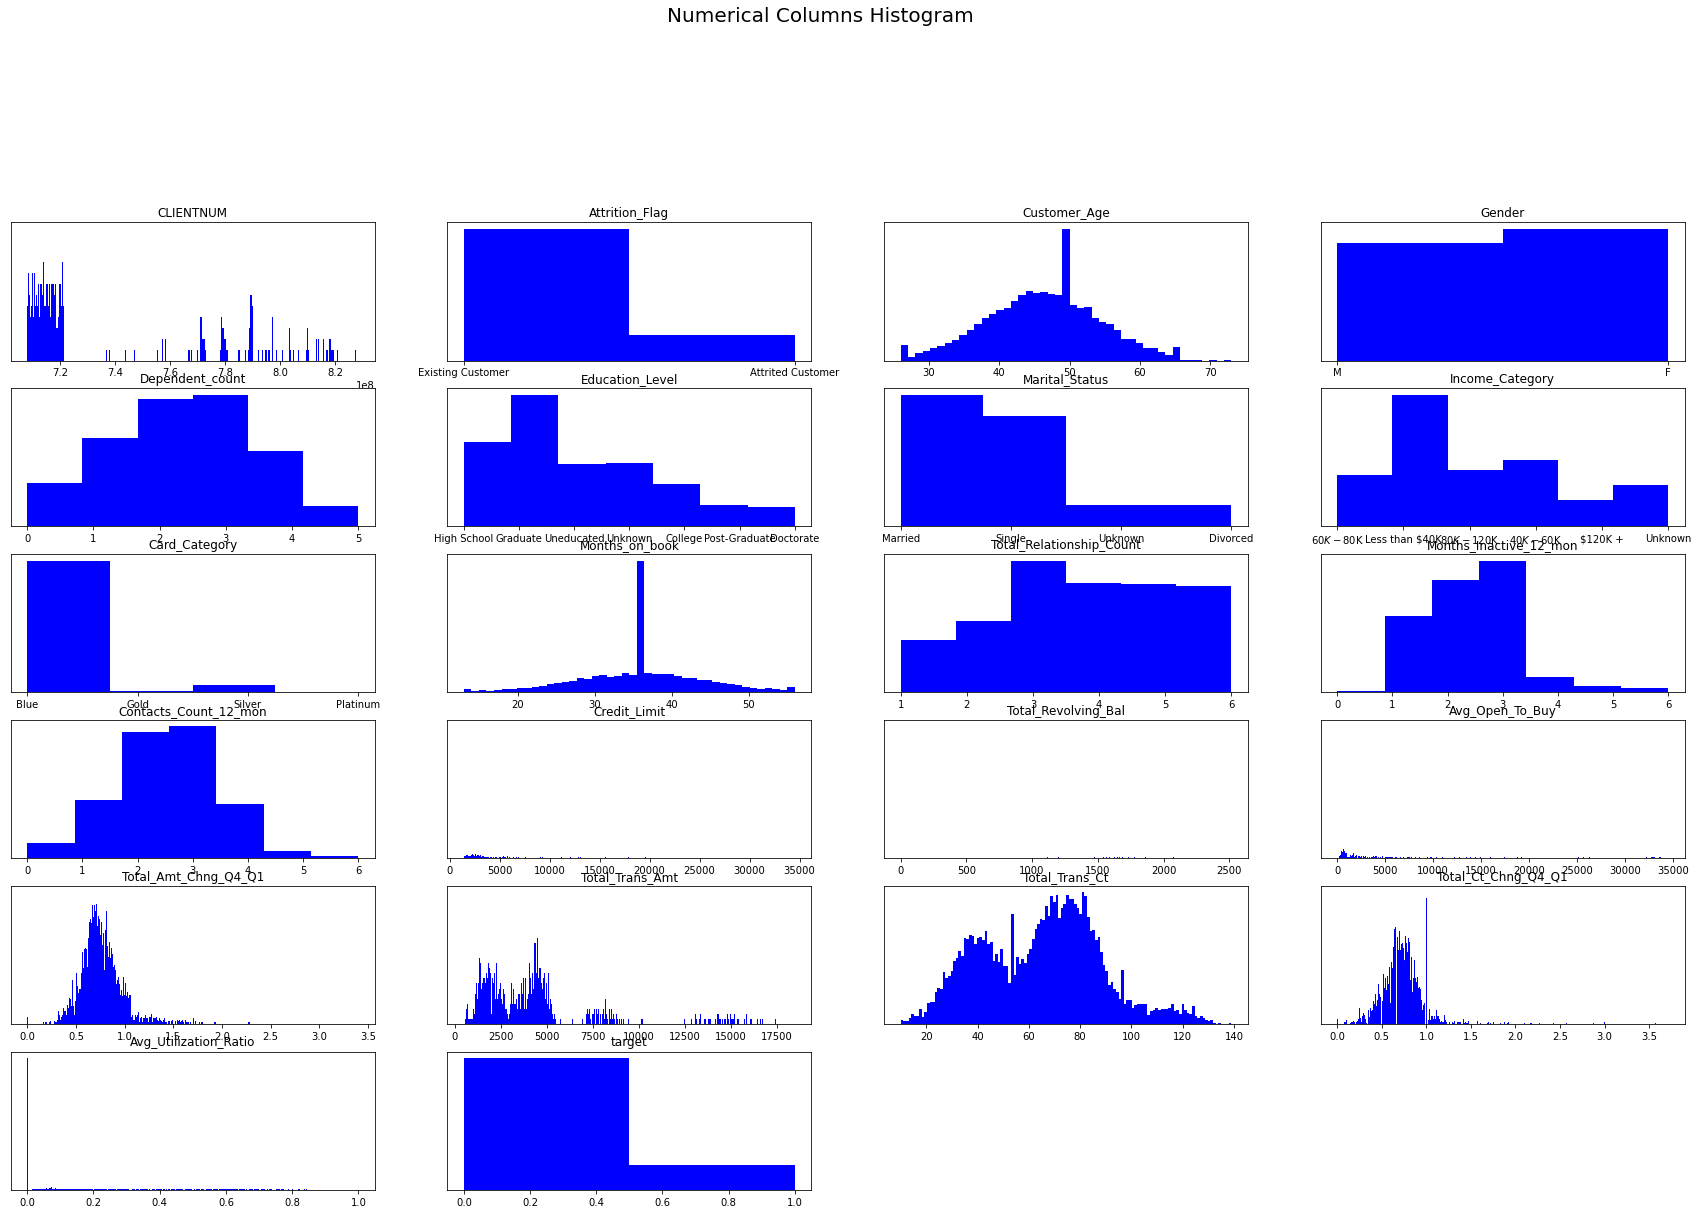

In [13]:
fig = plt.figure(figsize=(30, 30))
plt.suptitle('Numerical Columns Histogram', fontsize=20)
for i in range(1, df.shape[1] + 1):
    plt.subplot(10, 4, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df.columns.values[i - 1])

    vals = np.size(df.iloc[:, i - 1].unique())
    
    plt.hist(df.iloc[:, i - 1], bins=vals, color='Blue')

# 9. Visualizing data and checking for outliers 

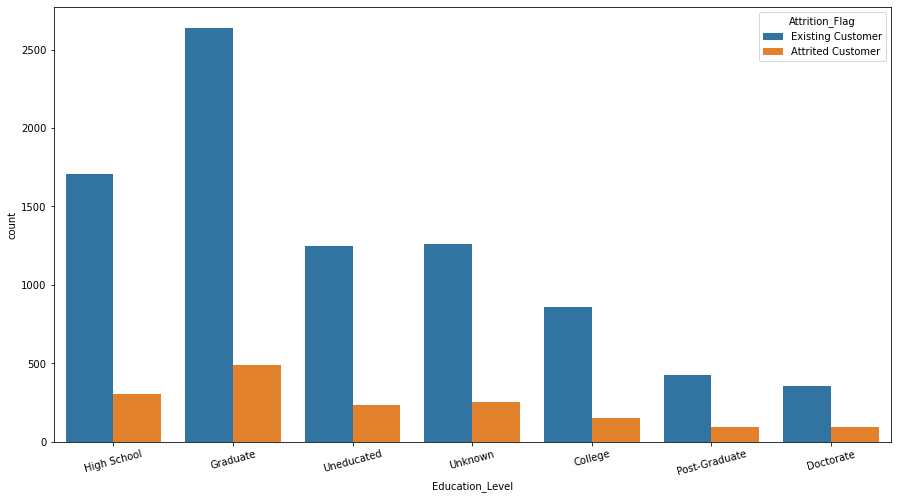

In [14]:
fig_dims = (15, 8)
fig, sns_plot = plt.subplots(figsize=fig_dims)
sns_plot = sns.countplot(x = "Education_Level", hue = "Attrition_Flag", data = df)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation = 15)
sns_plot.figure.savefig("Education_Level.png") #Save it as a png file for easier use in a report

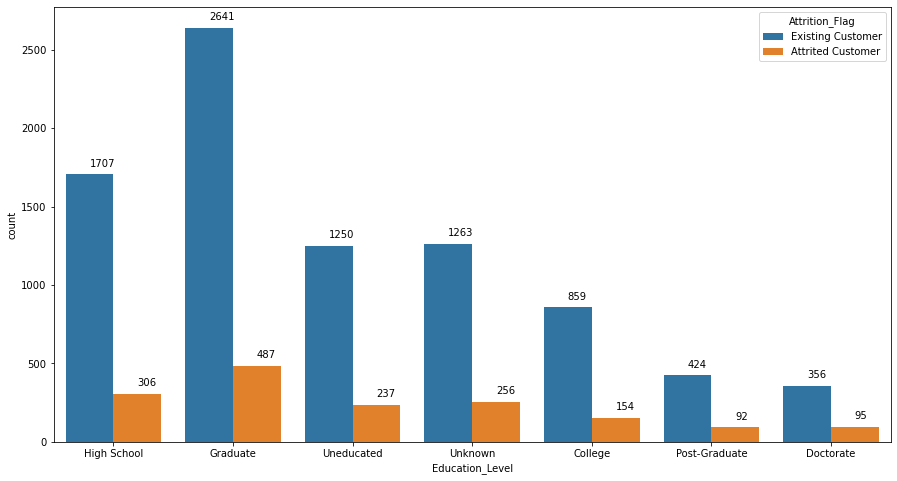

In [15]:
plt.figure(figsize=(15,8))
plot=sns.countplot(x=df.Education_Level,hue=df.Attrition_Flag)
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+50))
plt.show()

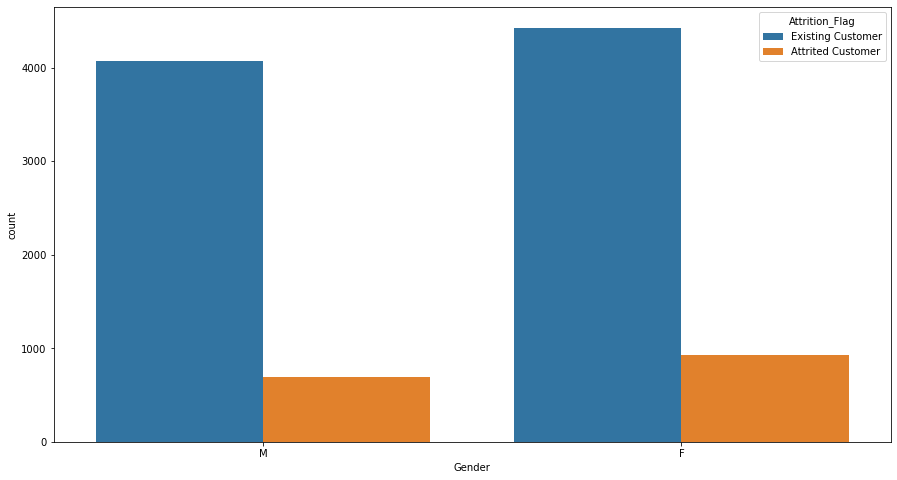

In [16]:
#Visualize the churn count for both Males and Females
plt.figure(figsize=(15,8))
sns.countplot(x=df.Gender, hue=df.Attrition_Flag,data = df)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation = 15)
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+50))
plt.show()

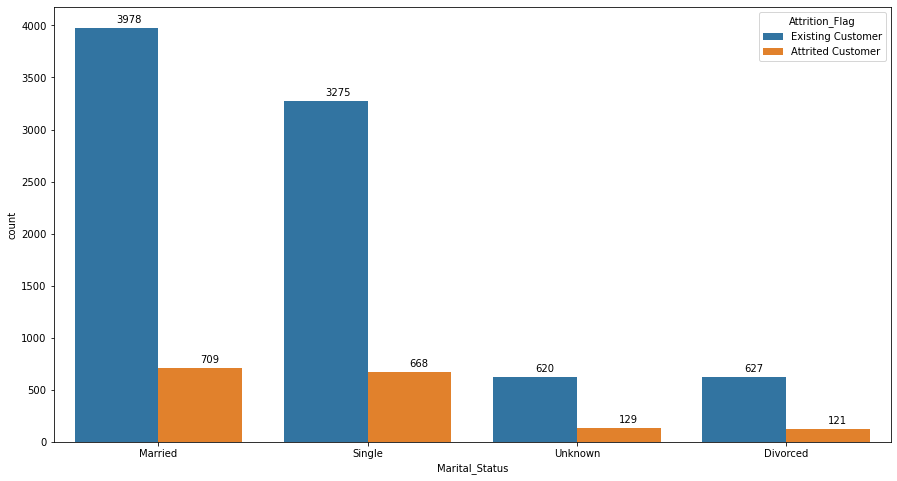

In [17]:
plt.figure(figsize=(15,8))
plot=sns.countplot(x=df.Marital_Status,hue=df.Attrition_Flag)
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+50))
plt.show()

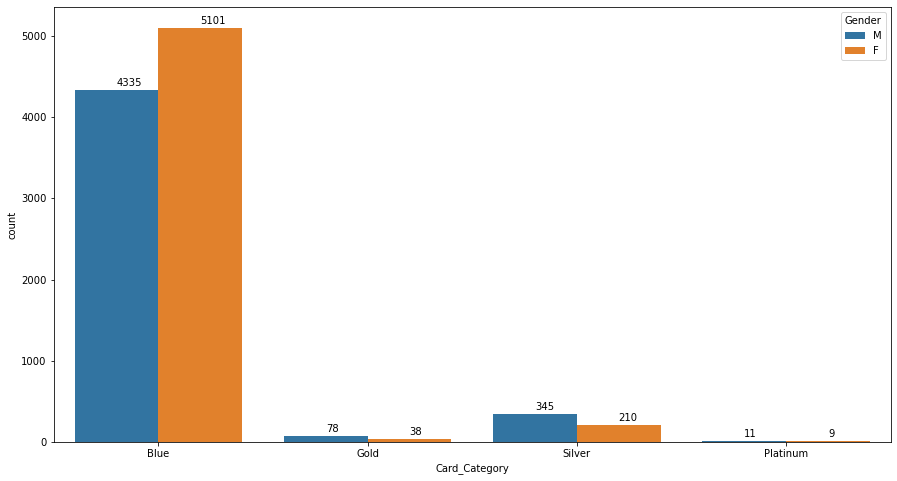

In [18]:
plt.figure(figsize=(15,8))
plot=sns.countplot(x=df.Card_Category,hue=df.Gender)
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+50))
plt.show()

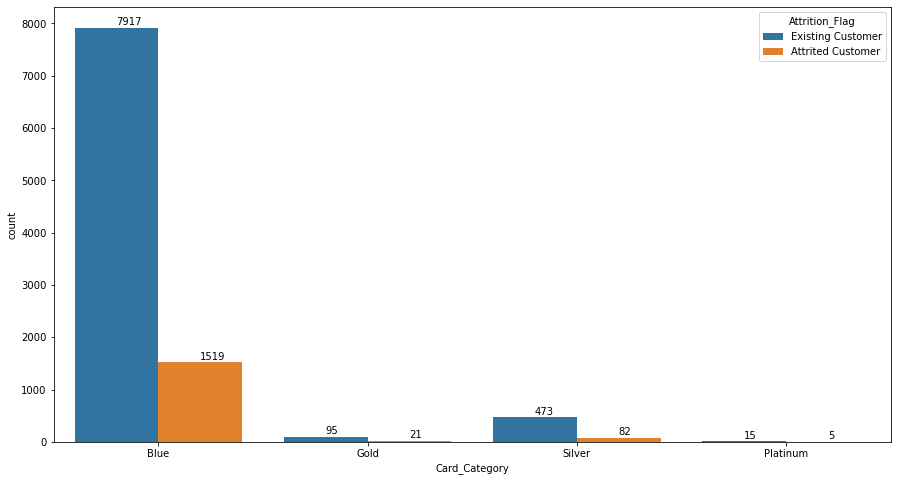

In [19]:
plt.figure(figsize=(15,8))
plot=sns.countplot(x=df.Card_Category,hue=df.Attrition_Flag)
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+50))
plt.show()

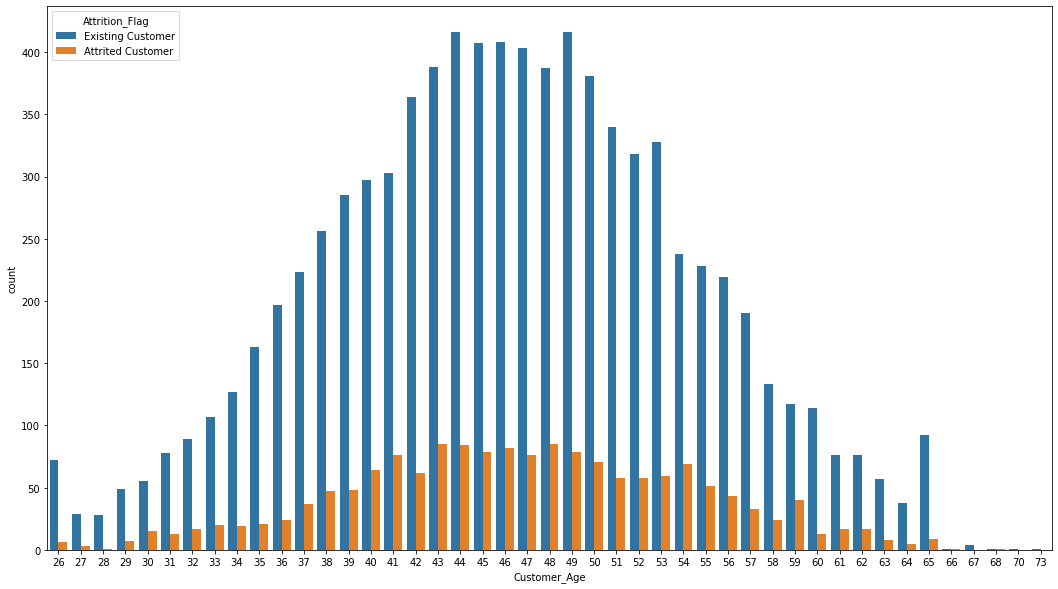

In [20]:
plt.figure(figsize=(18,10))
plot=sns.countplot(x=df.Customer_Age,hue=df.Attrition_Flag)
plt.show()

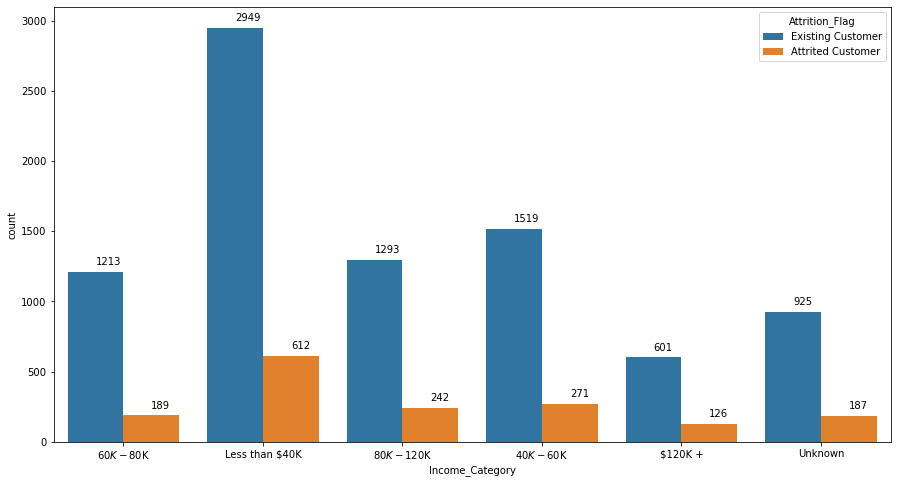

In [21]:
plt.figure(figsize=(15,8))
plot=sns.countplot(x=df.Income_Category,hue=df.Attrition_Flag)
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+50))
plt.show()

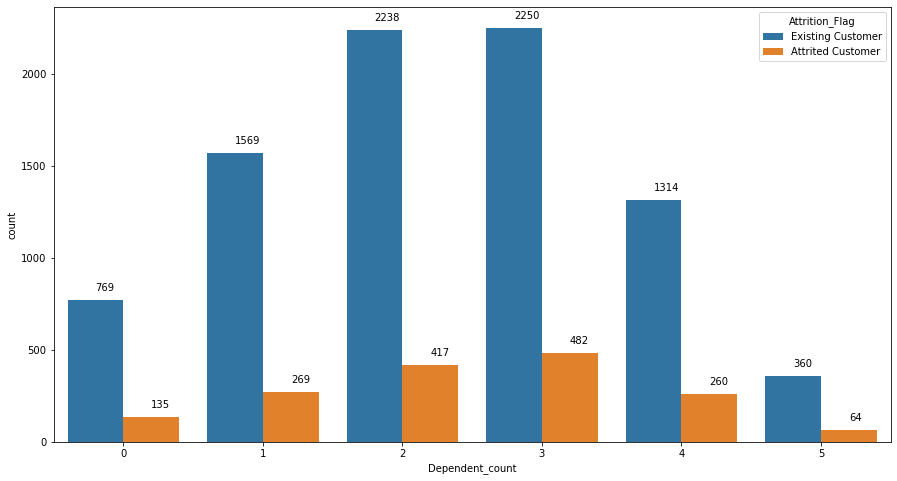

In [22]:
plt.figure(figsize=(15,8))
plot=sns.countplot(x=df.Dependent_count,hue=df.Attrition_Flag)
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+50))
plt.show()

[Text(0, 0, '$60K - $80K'),
 Text(0, 0, 'Less than $40K'),
 Text(0, 0, '$80K - $120K'),
 Text(0, 0, '$40K - $60K'),
 Text(0, 0, '$120K +'),
 Text(0, 0, 'Unknown')]

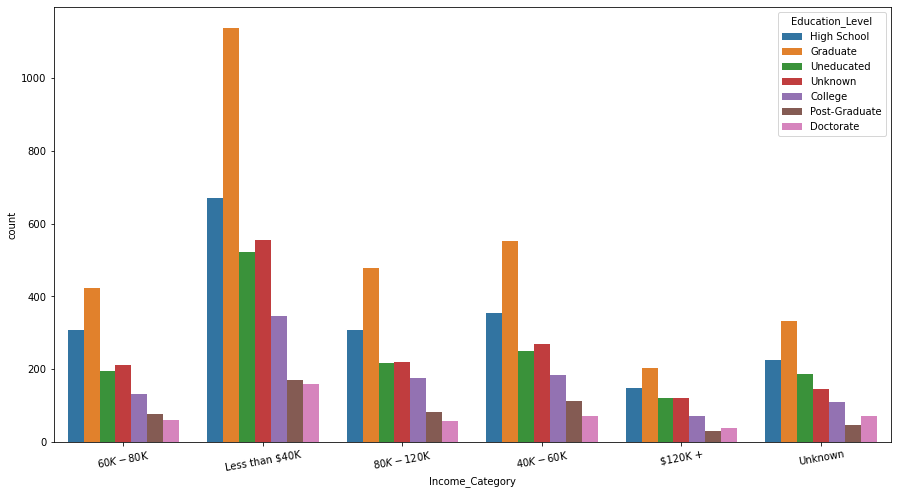

In [23]:
#plt.figure(figsize=(15,8))
#plot=sns.countplot(x=df.Income_Category,hue=df.Education_Level)
#plt.show()
fig_dims = (15, 8)
fig, sns_plot = plt.subplots(figsize=fig_dims)
sns_plot = sns.countplot(x="Income_Category", hue = "Education_Level", data = df)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation = 10)

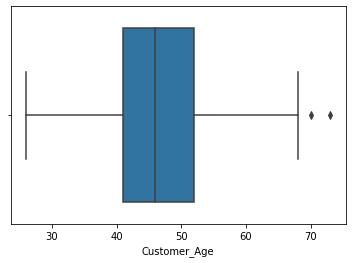

In [24]:
sns_plot=sns.boxplot(x='Customer_Age',data=df)
sns_plot.figure.savefig("Customer_Age.png")

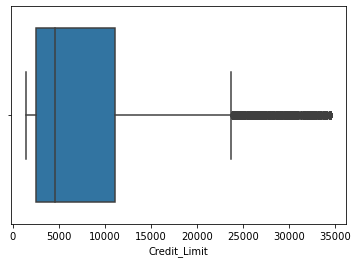

In [25]:
sns_plot=sns.boxplot(x='Credit_Limit',data=df)
sns_plot.figure.savefig("Credit_Limit.png")

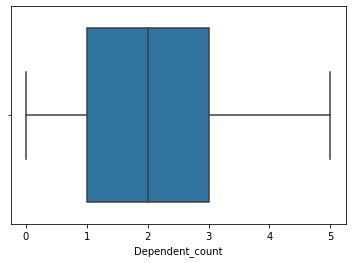

In [26]:
sns_plot=sns.boxplot(x='Dependent_count',data=df)
sns_plot.figure.savefig("Dependent_count.png")

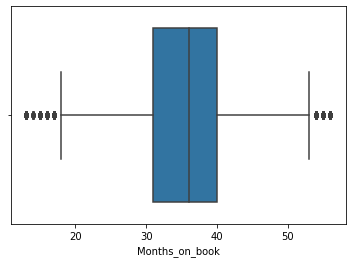

In [27]:
sns_plot=sns.boxplot(x='Months_on_book',data=df)
sns_plot.figure.savefig("Months_on_book.png")

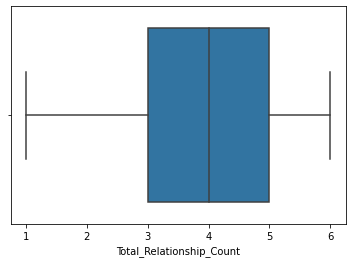

In [28]:
sns_plot=sns.boxplot(x='Total_Relationship_Count',data=df)
sns_plot.figure.savefig("Total_Relationship_Count.png")

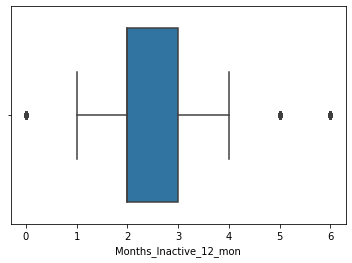

In [29]:
sns_plot=sns.boxplot(x='Months_Inactive_12_mon',data=df)
sns_plot.figure.savefig("Months_Inacative_12_mon.png")

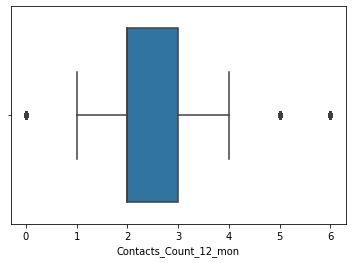

In [30]:
sns_plot=sns.boxplot(x='Contacts_Count_12_mon',data=df)
sns_plot.figure.savefig("Contacts_Count_12_mon.png")

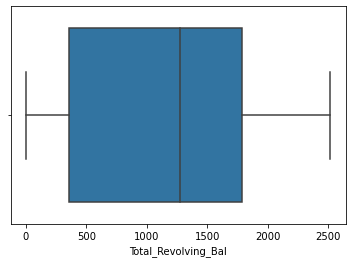

In [31]:
sns_plot=sns.boxplot(x='Total_Revolving_Bal',data=df)
sns_plot.figure.savefig("Total_Revolving_Bal.png")

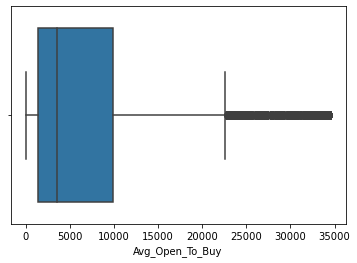

In [32]:
sns_plot=sns.boxplot(x='Avg_Open_To_Buy',data=df)
sns_plot.figure.savefig("Avg_Open_To_Buy.png")

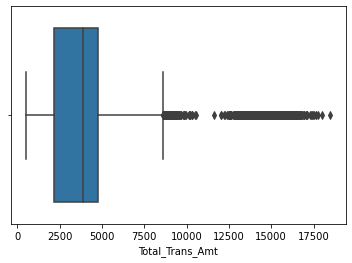

In [33]:
sns_plot=sns.boxplot(x='Total_Trans_Amt',data=df)
sns_plot.figure.savefig("Total_Trans_Amt.png")

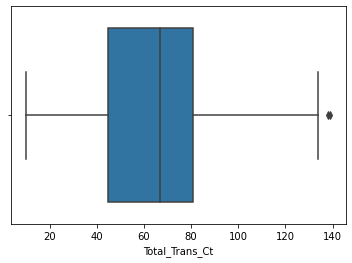

In [34]:
sns_plot=sns.boxplot(x='Total_Trans_Ct',data=df)
sns_plot.figure.savefig("Total_Trans_Ct.png")

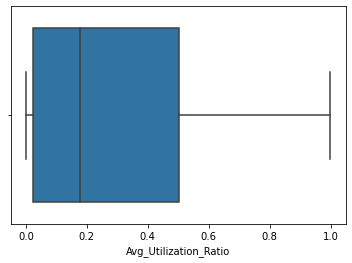

In [35]:
sns_plot=sns.boxplot(x='Avg_Utilization_Ratio',data=df)
sns_plot.figure.savefig("Avg_Utilization_Ratio.png")

# 10. Encoding the target variable

In [36]:
#df['target'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
#target is the attrited customer under the attrited flag variable

# 11. Split the data into Train Test
Stratify parameter is dirserabel to split the dataset to train and test in a way to retain the same proportion of classes in the train and test classes that are found in the entire original dataset.

In [37]:
#creating two Variables X & y and assigning to them and assin split train percentages as 20%  of data test and 80% train 
X = df.drop(['Attrition_Flag', 'target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [38]:
y_test.value_counts() / len(y_test)

0    0.839585
1    0.160415
Name: target, dtype: float64

In [39]:
y_train.value_counts() / len(y_train)

0    0.839279
1    0.160721
Name: target, dtype: float64

It is clear now the test and train datasets have the same proportion. This was achieve this by setting the “stratify” argument to the y component of the original dataset

In [40]:
# Combining both X_train and y_train 
df2 = pd.concat((X_train, y_train), axis=1)
df2.shape
df2

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
619,711231558,58,M,3,High School,Married,$60K - $80K,Blue,40,6,...,3,8308.0,2517,5791.0,1.455,1915,37,1.056,0.303,0
4612,818259558,64,F,0,Graduate,Single,Less than $40K,Blue,56,4,...,3,2294.0,1582,712.0,0.775,3951,79,0.881,0.690,0
568,711242058,48,M,4,Unknown,Single,$80K - $120K,Blue,36,1,...,1,11862.0,2517,9345.0,0.766,643,16,0.231,0.212,1
7590,709769283,36,F,4,Unknown,Divorced,Unknown,Blue,16,6,...,3,8513.0,0,8513.0,0.631,4162,70,1.000,0.000,0
669,785114808,46,M,2,Post-Graduate,Single,$40K - $60K,Silver,40,4,...,2,15459.0,0,15459.0,0.789,1419,30,0.667,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,712899333,47,F,4,College,Single,Less than $40K,Blue,37,6,...,2,4256.0,1084,3172.0,0.630,1100,29,0.381,0.255,0
3661,711080358,55,M,1,Unknown,Unknown,$120K +,Blue,46,4,...,2,19849.0,2205,17644.0,0.796,3657,66,0.737,0.111,0
380,710865633,41,F,2,Graduate,Married,Less than $40K,Silver,33,4,...,0,12301.0,2250,10051.0,0.484,1307,29,0.261,0.183,0
444,717198633,53,F,2,College,Married,$40K - $60K,Blue,34,6,...,1,2075.0,1469,606.0,1.322,2556,49,1.130,0.708,0


# 11. Data Analysis & Processing 

In [41]:
#classify our variables, the following categories can be calssified as ordinal  
ordinal_cat = {
    'Education_Level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
    'Income_Category': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
    'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum']
}

def encode_ordinals(df, ordinal_cat):
    s = df.copy()
    for var, values in ordinal_cat.items():
        s[var] = s[var].apply(lambda x: values.index(x) + 1
                                  if x is not np.nan else x)
    return s

In [42]:
X_train.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [43]:
#classify and split the variables

ordinal_vars = ['Income_Category','Education_Level','Card_Category']
categor_vars = ['Marital_Status','Gender']
num_vars = ['Customer_Age', 'Months_on_book', 'Dependent_count', 'Total_Relationship_Count',
             'Months_Inactive_12_mon',  'Credit_Limit', 'Contacts_Count_12_mon',
             'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt', 'Total_Trans_Ct','Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1']

In [44]:
#Checking to make sure we have all the variables and we're not missing any 
[col for col in X_train.columns
if col not in categor_vars + ordinal_vars + num_vars]

['CLIENTNUM']

# 12. Encoding & Imputation 
Using OneHotEncoder for the encoding & SimpleImputer function for imputation

In [45]:
def train_data(X):
    
    #looking for Unknown and replacing with nan
    X = X.replace('Unknown', np.nan)
    
    #encoding ordinal category
    X = encode_ordinals(X, ordinal_cat)
    
    #selecting Variables
    X_categor = X[categor_vars]
    X_ordinal = X[ordinal_vars]
    X_num = X[num_vars]
    
    #Imputing 
    from sklearn.impute import SimpleImputer
    cat_imputer = SimpleImputer(strategy="most_frequent")
    ord_imputer = SimpleImputer(strategy="median")
    num_imputer = SimpleImputer(strategy="median")
    
    X_categor = cat_imputer.fit_transform(X_categor)
    X_ordinal = ord_imputer.fit_transform(X_ordinal)
    X_num = num_imputer.fit_transform(X_num)
    
    #encoding categorical variables using oneHotEncoder function
    from sklearn.preprocessing import OneHotEncoder
    one_hot_encoder = OneHotEncoder()
    X_categor = one_hot_encoder.fit_transform(X_categor).toarray()
    
    p = [cat_imputer, ord_imputer, num_imputer, one_hot_encoder]
    X_prep = np.concatenate([X_categor, X_ordinal, X_num], axis=1)
    
    return X_prep, p

In [46]:
def test_data(X, p):
    
    cat_imputer, ord_imputer, num_imputer, one_hot_encoder = p
    
    #looking for Unknown and replacing with nan
    X = X.replace('Unknown', np.nan)

    #encoding ordinal category
    X = encode_ordinals(X, ordinal_cat)
    
    #selecting Variables
    X_cat = X[categor_vars]
    X_ord = X[ordinal_vars]
    X_num = X[num_vars]
    
    #Imputing
    X_cat = cat_imputer.transform(X_cat)
    X_ord = ord_imputer.transform(X_ord)
    X_num = num_imputer.transform(X_num)
    
    #encode categorical vars
    X_cat = one_hot_encoder.transform(X_cat).toarray()
    X_prep = np.concatenate([X_cat, X_ord, X_num], axis=1)
    
    return X_prep

# 13. Model building 

In [47]:
X_train_prep, p = train_data(X_train)
X_test_prep = test_data(X_test, p)

In [48]:
X_train_prep.shape, X_test_prep.shape

((8101, 22), (2026, 22))

# 14. Checking model Accuracy and F1 Score

In [49]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import make_scorer

score = make_scorer(f1_score)

# 15. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],
    'n_estimators': [120, 130, 140, 150, 160, 170]
}

rfc = RandomForestClassifier(random_state=42)

rfc_grid = GridSearchCV(rfc, 
                        params,
                        scoring=score,)

rfc_grid.fit(X_train_prep, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],
                         'n_estimators': [120, 130, 140, 150, 160, 170]},
             scoring=make_scorer(f1_score))

In [51]:
rfc_grid.best_params_

{'min_samples_leaf': 1, 'n_estimators': 170}

In [52]:
rfc = RandomForestClassifier(**rfc_grid.best_params_,
                             random_state=42)
rfc.fit(X_train_prep, y_train)

RandomForestClassifier(n_estimators=170, random_state=42)

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train_prep, y_train, cv=5, verbose=2, scoring=score)
print(scores)
print('Scores Mean = ', scores.mean(), ' Scores Standard Deviation = ', scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   2.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.6s
[CV]  ................................................................
[CV] ................................................. , total=   1.6s
[0.85239085 0.873706   0.85889571 0.82815735 0.86542443]
Scores Mean =  0.8557148685182827  Scores Standard Deviation =  0.015482507532473285


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.4s finished


# 16. Final accuracy and F1 score

In [54]:
from sklearn.metrics import accuracy_score
y_test_pred = rfc.predict(X_test_prep)
RF_ac = print("RF Accuracy Score = ",accuracy_score(y_test_pred, y_test))

RF Accuracy Score =  0.9624876604146101


In [55]:
y_test_pred = rfc.predict(X_test_prep)
RF_f1= print('RF F1 Score = ',f1_score(y_test_pred, y_test))

RF F1 Score =  0.8770226537216829


In [56]:
# Build a confusion matrix, which will provide insights into the accuracy of the model. 
confusion_matrixRF = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrixRF)
print('Accuracy: ',metrics.accuracy_score(y_test, y_test_pred))
plt.show()

Predicted     0    1
Actual              
0          1679   22
1            54  271
Accuracy:  0.9624876604146101


# 17. Feature importances

In [57]:
rfc.feature_importances_

array([0.00191938, 0.00520255, 0.00456286, 0.00693259, 0.00722516,
       0.00982629, 0.01229873, 0.00275172, 0.03367206, 0.02606929,
       0.01376187, 0.06653197, 0.02548369, 0.03490803, 0.02782247,
       0.10373473, 0.03377111, 0.06294652, 0.18477507, 0.16283741,
       0.06086079, 0.11210571])

In [58]:
#we're trying to get the index of every attribute in our decision trees
#our categorical attributes are one hot encoded, so our model looks at them as multiple attributes

features ={'Gender': [0, 1],
           'Marital_Status': [2, 3, 4]
          }

start = 5 

for f in ordinal_vars + num_vars:
    features[f] = [start]
    start += 1
    
print(features)

{'Gender': [0, 1], 'Marital_Status': [2, 3, 4], 'Income_Category': [5], 'Education_Level': [6], 'Card_Category': [7], 'Customer_Age': [8], 'Months_on_book': [9], 'Dependent_count': [10], 'Total_Relationship_Count': [11], 'Months_Inactive_12_mon': [12], 'Credit_Limit': [13], 'Contacts_Count_12_mon': [14], 'Total_Revolving_Bal': [15], 'Avg_Open_To_Buy': [16], 'Total_Amt_Chng_Q4_Q1': [17], 'Total_Trans_Amt': [18], 'Total_Trans_Ct': [19], 'Avg_Utilization_Ratio': [20], 'Total_Ct_Chng_Q4_Q1': [21]}


In [59]:
#Now we aggregate the importances of the one hot encoded attributes (features)

f_importances = [(feature, sum([rfc.feature_importances_[index] 
                  for index in indexes]))
                    for feature, indexes in features.items()]

f_importances = sorted(f_importances, key=lambda x: x[1], reverse=True)

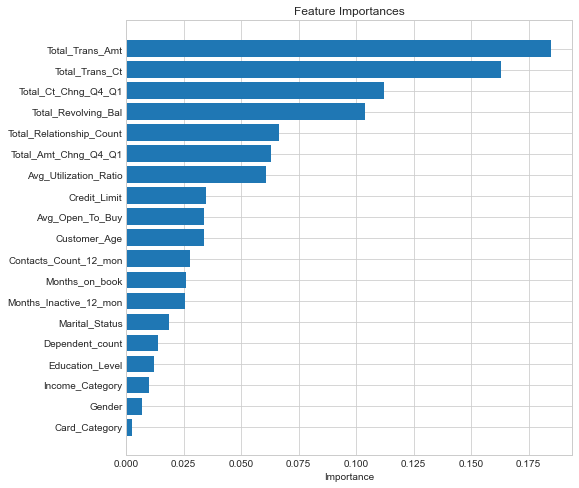

In [60]:
plt.style.use('seaborn-whitegrid')

features, importances = zip(*f_importances)

y_pos = np.arange(len(features))

fig, ax = plt.subplots(figsize=(8, 8))

ax.barh(y_pos, importances, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # Labels in the graph are flipped 
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')

plt.show()

# Section2 

# Logistic Regression

In [61]:
#Replacing the "unknowns" with NaNs
df1=df1.replace('Unknown', np.nan)

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           9015 non-null   object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [63]:
#Creating a DF with just the categorical data
obj_df = df1.select_dtypes(include=['object']).copy()
obj_df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,NaN,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [64]:
#Creating classes of columns (numerical and categorical)

numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

category_cols = [x for x in df1.columns if x not in ['CLIENTNUM']+numerical_cols] #Everything else is a categorical column

In [65]:
#Creating a dictionary to encode the categorical variables
cleanup_nums = {"Education_Level":{"Uneducated": 1, "High School": 2, "Graduate": 3, "Post-Graduate": 4, "College": 5, "Doctorate": 6},
                "Marital_Status": {"Single": 1, "Married": 2, "Divorced": 3},
               "Income_Category": {"Less than $40K": 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, "$120K +": 5},
               "Gender": {"M": 1, "F": 2},
               "Card_Category": {"Blue": 1, "Silver": 2, "Gold": 3, "Platinum": 4}}

In [66]:
#Creating a new DF with the encoded categorical variables
#Attrition Flag was left as is because that will be converted to dummies to better evaluate a model
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,1,2.0,2.0,3.0,1
1,Existing Customer,2,3.0,1.0,1.0,1
2,Existing Customer,1,3.0,2.0,4.0,1
3,Existing Customer,2,2.0,NaN,1.0,1
4,Existing Customer,1,1.0,2.0,3.0,1


In [67]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  object 
 1   Gender           10127 non-null  int64  
 2   Education_Level  8608 non-null   float64
 3   Marital_Status   9378 non-null   float64
 4   Income_Category  9015 non-null   float64
 5   Card_Category    10127 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 474.8+ KB


In [68]:
#Putting dummies in the Attrition Flag column
obj_df=pd.get_dummies(obj_df, prefix=['Attrition_Flag'], columns=['Attrition_Flag'])

In [69]:
#Creating a new DF with the categorical features removed
#Will later be replaced with encoded and imputed features
df2 = df1.drop(['Education_Level', 'Marital_Status', 'Income_Category','Attrition_Flag', 'Gender', 'Card_Category', 'CLIENTNUM','target'], axis=1)
df2

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [70]:
#New DF with the encoded categorical variables added
df3 = pd.concat([obj_df, df2], axis=1)
df3

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Customer_Age,Dependent_count,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,2.0,2.0,3.0,1,0,1,45,3,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,2,3.0,1.0,1.0,1,0,1,49,5,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,3.0,2.0,4.0,1,0,1,51,3,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,2,2.0,NaN,1.0,1,0,1,40,4,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,1.0,2.0,3.0,1,0,1,40,3,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,3.0,1.0,2.0,1,0,1,50,2,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,NaN,3.0,2.0,1,1,0,41,2,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,2,2.0,2.0,1.0,1,1,0,44,1,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,3.0,NaN,2.0,1,1,0,30,2,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            10127 non-null  int64  
 1   Education_Level                   8608 non-null   float64
 2   Marital_Status                    9378 non-null   float64
 3   Income_Category                   9015 non-null   float64
 4   Card_Category                     10127 non-null  int64  
 5   Attrition_Flag_Attrited Customer  10127 non-null  uint8  
 6   Attrition_Flag_Existing Customer  10127 non-null  uint8  
 7   Customer_Age                      10127 non-null  int64  
 8   Dependent_count                   10127 non-null  int64  
 9   Months_on_book                    10127 non-null  int64  
 10  Total_Relationship_Count          10127 non-null  int64  
 11  Months_Inactive_12_mon            10127 non-null  int64  
 12  Cont

In [72]:
#Setting up a KNN imputer
imputer = KNNImputer(n_neighbors=10) #k=10 is arbitrary at this point
imputed = imputer.fit_transform(df3)
df_imputed = pd.DataFrame(imputed, columns=df3.columns) #Renaming the imputed DF

In [73]:
df_imputed

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Customer_Age,Dependent_count,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,2.0,2.0,3.0,1.0,0.0,1.0,45.0,3.0,39.0,...,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,2.0,3.0,1.0,1.0,1.0,0.0,1.0,49.0,5.0,44.0,...,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,1.0,3.0,2.0,4.0,1.0,0.0,1.0,51.0,3.0,36.0,...,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,2.0,2.0,1.8,1.0,1.0,0.0,1.0,40.0,4.0,34.0,...,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,1.0,1.0,2.0,3.0,1.0,0.0,1.0,40.0,3.0,21.0,...,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,3.0,1.0,2.0,1.0,0.0,1.0,50.0,2.0,40.0,...,2.0,3.0,4003.0,1851.0,2152.0,0.703,15476.0,117.0,0.857,0.462
10123,1.0,3.4,3.0,2.0,1.0,1.0,0.0,41.0,2.0,25.0,...,2.0,3.0,4277.0,2186.0,2091.0,0.804,8764.0,69.0,0.683,0.511
10124,2.0,2.0,2.0,1.0,1.0,1.0,0.0,44.0,1.0,36.0,...,3.0,4.0,5409.0,0.0,5409.0,0.819,10291.0,60.0,0.818,0.000
10125,1.0,3.0,1.5,2.0,1.0,1.0,0.0,30.0,2.0,36.0,...,3.0,3.0,5281.0,0.0,5281.0,0.535,8395.0,62.0,0.722,0.000


In [74]:
#Rounded the values to the nearest number
df_imputed=df_imputed.round(0)
df_imputed.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Customer_Age,Dependent_count,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,2.0,2.0,3.0,1.0,0.0,1.0,45.0,3.0,39.0,...,1.0,3.0,12691.0,777.0,11914.0,1.0,1144.0,42.0,2.0,0.0
1,2.0,3.0,1.0,1.0,1.0,0.0,1.0,49.0,5.0,44.0,...,1.0,2.0,8256.0,864.0,7392.0,2.0,1291.0,33.0,4.0,0.0
2,1.0,3.0,2.0,4.0,1.0,0.0,1.0,51.0,3.0,36.0,...,1.0,0.0,3418.0,0.0,3418.0,3.0,1887.0,20.0,2.0,0.0
3,2.0,2.0,2.0,1.0,1.0,0.0,1.0,40.0,4.0,34.0,...,4.0,1.0,3313.0,2517.0,796.0,1.0,1171.0,20.0,2.0,1.0
4,1.0,1.0,2.0,3.0,1.0,0.0,1.0,40.0,3.0,21.0,...,1.0,0.0,4716.0,0.0,4716.0,2.0,816.0,28.0,2.0,0.0


In [75]:
df_imputed10 = df_imputed # we can use this copy for KNN dataset

In [76]:
#Setting up a train/test split to evaluate the KNN imputation
y=df_imputed['Attrition_Flag_Attrited Customer']
X=df_imputed.drop(['Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer'], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train2.columns

In [77]:
#Checking to see what the optimum number of K for KNN imputation actually is

rmse_val = [] #to store rmse values for different k
for K in range(50): #Use up to 50 nearest neighbours
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train2, y_train2)  #fit the model
    pred=model.predict(X_test2) #make prediction on test set
    error = sqrt(mean_squared_error(y_test2,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3573143949444033
RMSE value for k=  2 is: 0.31156284288640135
RMSE value for k=  3 is: 0.3019079397437066
RMSE value for k=  4 is: 0.29239145127135857
RMSE value for k=  5 is: 0.2869315488433068
RMSE value for k=  6 is: 0.2836926471433759
RMSE value for k=  7 is: 0.28132051473553615
RMSE value for k=  8 is: 0.2778110241155043
RMSE value for k=  9 is: 0.2761000116061324
RMSE value for k=  10 is: 0.2784281078729335
RMSE value for k=  11 is: 0.2782991995982396
RMSE value for k=  12 is: 0.2775075465193632
RMSE value for k=  13 is: 0.27796719600664976
RMSE value for k=  14 is: 0.27757467397561053
RMSE value for k=  15 is: 0.2783473375483962
RMSE value for k=  16 is: 0.2784949472964064
RMSE value for k=  17 is: 0.2785435887053008
RMSE value for k=  18 is: 0.2784314636756696
RMSE value for k=  19 is: 0.27810710910929876
RMSE value for k=  20 is: 0.2775966284397065
RMSE value for k=  21 is: 0.2780550981412249
RMSE value for k=  22 is: 0.27802667887116655
RMSE value f

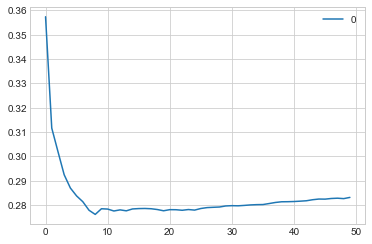

In [78]:
#plotting the rmse values against k values for visuals
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [79]:
#Creating a Train/Test Split

y=df_imputed['Attrition_Flag_Attrited Customer']
X=df_imputed.drop(['Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer'], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train2.columns

In [80]:
#Creating SMOTE'd data for the model

os = SMOTE(random_state=41)

os_data_X,os_data_y=os.fit_sample(X_train2,y_train2)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Attrition_Flag_Attrited Customer"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of yes in oversampled data",len(os_data_y[os_data_y["Attrition_Flag_Attrited Customer"]=='Yes']))
print("No.of No transcation",len(os_data_y[os_data_y["Attrition_Flag_Attrited Customer"]=='No']))
print("Proportion of churn yes data in oversampled data is ",len(os_data_y[os_data_y["Attrition_Flag_Attrited Customer"]=='Yes'])/len(os_data_X))
print("Proportion of no data in oversampled data is ",len(os_data_y[os_data_y["Attrition_Flag_Attrited Customer"]=='No'])/len(os_data_X))

length of oversampled data is  11834
Number of yes in oversampled data 0
No.of No transcation 0
Proportion of churn yes data in oversampled data is  0.0
Proportion of no data in oversampled data is  0.0


In [81]:
#Using logistic regression on a train/test split
X=os_data_X #The independent variable
y=os_data_y #What we are trying to predict
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y, test_size=0.3, random_state=0) #Train/Test Split

model=LogisticRegression(max_iter=50000) #Max iter is high just so the entire dataset is used
model.fit(X_train2, np.ravel(y_train2))


print('Logistic Regression:')
print('Training Model accuracy: {:.2%}'.format(model.score(X_train2,y_train2)))
print('Test Model accuracy: {:.2%}'.format(model.score(X_test2,y_test2['Attrition_Flag_Attrited Customer'])))

Logistic Regression:
Training Model accuracy: 83.97%
Test Model accuracy: 83.47%


In [82]:
#Printing a classification report and confusion matrix from the logistic regression model

predictions = model.predict(X_test2)
print(classification_report(y_test2,predictions))
print ("Confusion Matrix")
print(confusion_matrix(y_test2, predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1758
         1.0       0.83      0.85      0.84      1793

    accuracy                           0.83      3551
   macro avg       0.84      0.83      0.83      3551
weighted avg       0.83      0.83      0.83      3551

Confusion Matrix
[[1436  322]
 [ 265 1528]]


In [83]:
clf_reg = LogisticRegression(max_iter=20000);
clf_reg.fit(X_train2, y_train2);

In [84]:
 y_score2 = clf_reg.predict_proba(X_test2)[:,1]

In [85]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test2, y_score2)

In [86]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test2, y_score2))

roc_auc_score for Logistic Regression:  0.9149733478760468


Train/Test split results:
LogisticRegression accuracy is 0.835
LogisticRegression log_loss is 0.367
LogisticRegression auc is 0.915


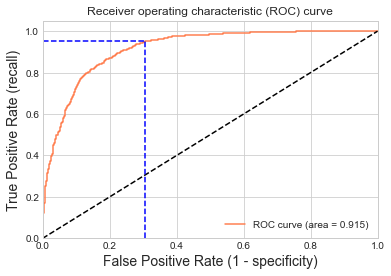

Using a threshold of 0.281 guarantees a sensitivity of 0.950 and a specificity of 0.693, i.e. a false positive rate of 30.66%.


In [88]:
# create X (features) and y (response)
X = os_data_X
y = os_data_y

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check classification scores of logistic regression
logreg = LogisticRegression(max_iter=20000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
LR_ac = print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# KNN 

In [89]:
df_imputed10.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Customer_Age,Dependent_count,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,2.0,2.0,3.0,1.0,0.0,1.0,45.0,3.0,39.0,...,1.0,3.0,12691.0,777.0,11914.0,1.0,1144.0,42.0,2.0,0.0
1,2.0,3.0,1.0,1.0,1.0,0.0,1.0,49.0,5.0,44.0,...,1.0,2.0,8256.0,864.0,7392.0,2.0,1291.0,33.0,4.0,0.0
2,1.0,3.0,2.0,4.0,1.0,0.0,1.0,51.0,3.0,36.0,...,1.0,0.0,3418.0,0.0,3418.0,3.0,1887.0,20.0,2.0,0.0
3,2.0,2.0,2.0,1.0,1.0,0.0,1.0,40.0,4.0,34.0,...,4.0,1.0,3313.0,2517.0,796.0,1.0,1171.0,20.0,2.0,1.0
4,1.0,1.0,2.0,3.0,1.0,0.0,1.0,40.0,3.0,21.0,...,1.0,0.0,4716.0,0.0,4716.0,2.0,816.0,28.0,2.0,0.0


In [90]:
#Setting up a train/test split to evaluate the KNN imputation
y=df_imputed10['Attrition_Flag_Attrited Customer']
X=df_imputed10.drop(['Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer'], axis=1)
X_train10, X_test10, y_train10, y_test10 = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train10.columns

In [91]:
#Checking to see what the optimum number of K for KNN imputation actually is

rmse_val = [] #to store rmse values for different k
for K in range(50): #Use up to 50 nearest neighbours
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train10, y_train10)  #fit the model
    pred=model.predict(X_test10) #make prediction on test set
    error = sqrt(mean_squared_error(y_test10,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3573143949444033
RMSE value for k=  2 is: 0.31156284288640135
RMSE value for k=  3 is: 0.3019079397437066
RMSE value for k=  4 is: 0.29239145127135857
RMSE value for k=  5 is: 0.2869315488433068
RMSE value for k=  6 is: 0.2836926471433759
RMSE value for k=  7 is: 0.28132051473553615
RMSE value for k=  8 is: 0.2778110241155043
RMSE value for k=  9 is: 0.2761000116061324
RMSE value for k=  10 is: 0.2784281078729335
RMSE value for k=  11 is: 0.2782991995982396
RMSE value for k=  12 is: 0.2775075465193632
RMSE value for k=  13 is: 0.27796719600664976
RMSE value for k=  14 is: 0.27757467397561053
RMSE value for k=  15 is: 0.2783473375483962
RMSE value for k=  16 is: 0.2784949472964064
RMSE value for k=  17 is: 0.2785435887053008
RMSE value for k=  18 is: 0.2784314636756696
RMSE value for k=  19 is: 0.27810710910929876
RMSE value for k=  20 is: 0.2775966284397065
RMSE value for k=  21 is: 0.2780550981412249
RMSE value for k=  22 is: 0.27802667887116655
RMSE value f

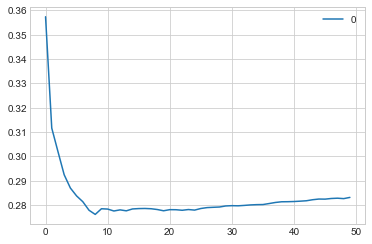

In [92]:
#plotting the rmse values against k values for visuals
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [93]:
#Creating a Train/Test Split

y=df_imputed10['Attrition_Flag_Attrited Customer']
X=df_imputed10.drop(['Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer'], axis=1)
X_train11, X_test11, y_train11, y_test11 = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train11.columns

In [94]:
#Creating SMOTE'd data for the model

os1 = SMOTE(random_state=41)

os_data_X1,os_data_y=os1.fit_sample(X_train11,y_train11)
os_data_X1 = pd.DataFrame(data=os_data_X1,columns=columns )
os_data_y1= pd.DataFrame(data=os_data_y,columns=["Attrition_Flag_Attrited Customer"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X1))
print("Number of yes in oversampled data",len(os_data_y1[os_data_y1["Attrition_Flag_Attrited Customer"]=='Yes']))
print("No.of No transcation",len(os_data_y1[os_data_y1["Attrition_Flag_Attrited Customer"]=='No']))
print("Proportion of churn yes data in oversampled data is ",len(os_data_y1[os_data_y1["Attrition_Flag_Attrited Customer"]=='Yes'])/len(os_data_X1))
print("Proportion of no data in oversampled data is ",len(os_data_y1[os_data_y1["Attrition_Flag_Attrited Customer"]=='No'])/len(os_data_X1))

length of oversampled data is  11834
Number of yes in oversampled data 0
No.of No transcation 0
Proportion of churn yes data in oversampled data is  0.0
Proportion of no data in oversampled data is  0.0


In [95]:

knn = KNeighborsClassifier()

## Set up hyperparameter grid for tuning
knn_param_grid = {'n_neighbors' : np.arange(5,26),
                  'weights' : ['uniform', 'distance']}

## Tune hyperparameters
knn_cv = GridSearchCV(knn, param_grid = knn_param_grid, cv = 5)

## Fit knn to training data
knn_cv.fit(X_train11, y_train11)

## Get info about best hyperparameters
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best KNN Training Score:{}".format(knn_cv.best_score_)) 

## Predict knn on test data
print("KNN Test Performance: {}".format(knn_cv.score(X_test11, y_test11)))

## Obtain model performance metrics
knn_pred_prob = knn_cv.predict_proba(X_test11)[:,1]
knn_auroc = roc_auc_score(y_test11, knn_pred_prob)
print("KNN AUROC: {}".format(knn_auroc))
knn_y_pred = knn_cv.predict(X_test11)
print(classification_report(y_test11, knn_y_pred))


#predictions = model.predict(X_test11)
#print ("Confusion Matrix")
#print(confusion_matrix(y_test11, predictions))

Tuned KNN Parameters: {'n_neighbors': 16, 'weights': 'distance'}
Best KNN Training Score:0.8944691351143131
KNN Test Performance: 0.8970055939453768
KNN AUROC: 0.9119075636245085
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2583
         1.0       0.70      0.55      0.61       456

    accuracy                           0.90      3039
   macro avg       0.81      0.75      0.78      3039
weighted avg       0.89      0.90      0.89      3039



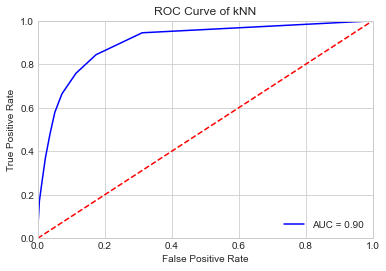

In [96]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train11,y_train11)

y_scores = knn.predict_proba(X_test11)
fpr, tpr, threshold = roc_curve(y_test11, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Comparison between Models 

# 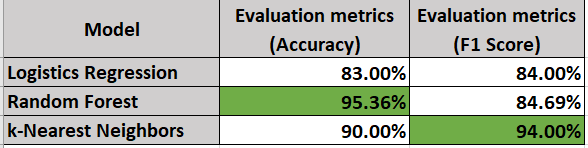